# Importing libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

# Importing dataset

In [2]:
df = pd.read_csv(r'dataset.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


# Finding out if there are any missing values

In [3]:
print(df.isna().sum())

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

There are no missing values in the dataset.

# Removing columns with only one unique value
This is because these columns will no affect the model

In [4]:
print(df['EmployeeCount'].nunique())
print(df['Over18'].nunique())
print(df['StandardHours'].nunique())

1
1
1


In [5]:
df.drop(['EmployeeCount', 'Over18', 'StandardHours'],
        axis = 1,
        inplace = True)
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,3,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,4,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,5,4,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,7,1,...,3,4,1,6,3,3,2,2,2,2


# Mean and Standard Deviation

# * Grouping by Business Travel

In [6]:
df.groupby('BusinessTravel').mean()

,Age,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
BusinessTravel,,,,,,,,,,,,,,,,,,,,,
Non-Travel,36.620000,816.960000,9.760000,2.926667,1064.626667,2.733333,64.866667,2.633333,2.040000,2.793333,...,3.173333,2.780000,0.866667,10.593333,2.720000,2.773333,7.146667,4.353333,2.386667,4.300000
Travel_Frequently,36.454874,792.628159,9.277978,2.895307,1014.898917,2.693141,65.097473,2.736462,2.014440,2.790614,...,3.166065,2.776173,0.765343,11.083032,2.815884,2.776173,7.173285,4.241877,2.342960,4.216606
Travel_Rarely,37.092042,803.022052,9.088207,2.915628,1021.793864,2.727709,66.249281,2.742090,2.080537,2.702780,...,3.147651,2.685523,0.790988,11.430489,2.806328,2.755513,6.944391,4.208054,2.117929,4.072867


In [7]:
df.groupby('BusinessTravel').std()

,Age,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
BusinessTravel,,,,,,,,,,,,,,,,,,,,,
Non-Travel,8.776624,409.735942,8.518972,1.036881,607.955718,1.084774,20.086279,0.780781,0.995830,1.031690,...,0.379803,1.092193,0.902396,7.426686,1.376310,0.734085,6.173538,3.584337,3.549812,3.583613
Travel_Frequently,8.547541,382.286649,8.421332,1.045979,595.666954,1.117899,20.229514,0.706496,1.059707,1.099828,...,0.372813,1.080329,0.829150,7.539531,1.235950,0.697103,6.127179,3.347503,3.278398,3.584894
Travel_Rarely,9.337414,408.373491,7.964405,1.017399,603.204836,1.088533,20.398788,0.702082,1.134537,1.113459,...,0.354924,1.079761,0.850897,7.893346,1.291073,0.705514,6.124334,3.701150,3.158101,3.563580


# * Grouping by Department

In [8]:
df.groupby('Department').mean()

,Age,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Department,,,,,,,,,,,,,,,,,,,,,
Human Resources,37.809524,751.539683,8.698413,2.968254,1205.269841,2.682540,64.301587,2.746032,2.031746,2.603175,...,3.142857,2.888889,0.777778,11.555556,2.555556,2.920635,7.238095,3.539683,1.777778,3.666667
Research & Development,37.042664,806.851197,9.144641,2.899063,1006.503642,2.744017,66.167534,2.741935,1.977107,2.726327,...,3.162331,2.708637,0.804370,11.342352,2.792924,2.725286,6.864724,4.155047,2.137357,4.084287
Sales,36.542601,800.275785,9.365471,2.934978,1038.946188,2.679372,65.520179,2.701794,2.255605,2.751121,...,3.136771,2.695067,0.773543,11.105381,2.847534,2.816143,7.284753,4.486547,2.354260,4.271300


In [9]:
df.groupby('Department').std()

,Age,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Department,,,,,,,,,,,,,,,,,,,,,
Human Resources,9.226290,426.203943,8.115368,0.983218,584.798179,1.013225,21.562090,0.717708,1.379203,1.070720,...,0.352738,1.001791,0.869639,8.855066,1.201850,0.725160,6.890185,2.827431,2.510908,2.923762
Research & Development,9.178964,402.513333,8.122044,1.024293,602.681958,1.102567,20.249281,0.714435,1.152667,1.101620,...,0.368946,1.070640,0.857092,7.797326,1.314103,0.716964,6.024119,3.646045,3.200565,3.571031
Sales,9.032611,402.797474,8.086808,1.031105,599.722536,1.084259,20.354461,0.705259,0.927557,1.111103,...,0.343992,1.114288,0.840182,7.597168,1.244884,0.675284,6.234885,3.660116,3.353357,3.643117


# * Grouping by EducationField

In [10]:
df.groupby('EducationField').mean()

,Age,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
EducationField,,,,,,,,,,,,,,,,,,,,,
Human Resources,37.037037,675.259259,9.037037,3.111111,1180.370370,2.666667,60.888889,2.740741,2.148148,2.555556,...,3.111111,3.037037,0.925926,11.592593,2.444444,2.740741,6.777778,3.555556,1.629630,3.370370
Life Sciences,37.107261,804.425743,8.955446,2.929043,1024.427393,2.689769,66.831683,2.732673,2.052805,2.797030,...,3.158416,2.686469,0.775578,11.245875,2.739274,2.727723,6.993399,4.308581,2.178218,4.138614
Marketing,37.924528,727.836478,10.106918,3.125786,999.830189,2.723270,66.150943,2.691824,2.358491,2.654088,...,3.132075,2.691824,0.849057,11.855346,2.691824,2.798742,7.559748,4.490566,2.245283,4.465409
Medical,36.838362,822.799569,9.353448,2.803879,1017.165948,2.687500,65.280172,2.747845,2.040948,2.691810,...,3.161638,2.760776,0.836207,11.564655,2.933190,2.762931,7.105603,4.088362,2.295259,4.062500
Other,35.365854,796.024390,8.926829,3.073171,1050.695122,3.012195,62.365854,2.695122,1.987805,2.743902,...,3.170732,2.621951,0.646341,10.353659,2.756098,2.853659,6.243902,3.975610,1.658537,3.951220
Technical Degree,36.121212,842.128788,8.810606,2.825758,1036.242424,2.818182,66.621212,2.719697,1.871212,2.659091,...,3.128788,2.674242,0.727273,10.250000,2.833333,2.810606,6.590909,4.340909,2.227273,4.113636


In [11]:
df.groupby('EducationField').std()

,Age,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
EducationField,,,,,,,,,,,,,,,,,,,,,
Human Resources,8.604478,436.471657,8.451133,0.933700,650.150465,1.000000,21.219246,0.859006,1.485926,1.154701,...,0.320256,0.897924,0.997147,8.727760,1.154701,0.764229,6.021330,2.965615,2.529034,2.989059
Life Sciences,8.872655,402.563012,8.116690,1.013911,599.947400,1.119088,20.300097,0.725786,1.106189,1.099988,...,0.365432,1.094259,0.822693,7.792809,1.271951,0.711272,6.120548,3.789785,3.293558,3.655485
Marketing,9.153783,394.040573,8.174204,1.035705,611.726786,1.078630,20.473876,0.645821,0.969686,1.136213,...,0.339643,1.174355,0.858234,7.900358,1.072969,0.644155,6.719131,3.545130,3.221205,3.839798
Medical,9.481012,395.224638,8.118192,1.036226,607.853537,1.085629,20.074568,0.722214,1.148031,1.096754,...,0.368516,1.039652,0.914902,8.070165,1.398031,0.710797,6.293029,3.458291,3.269913,3.498592
Other,7.946600,417.809277,7.174682,0.965842,592.187756,1.012196,20.831785,0.697244,1.048148,1.120086,...,0.378590,1.107107,0.743232,6.830165,1.048938,0.687129,5.424137,3.531081,2.644442,3.460188
Technical Degree,9.808106,423.208310,8.463782,1.022616,580.917504,1.068767,20.609614,0.668990,1.014440,1.075966,...,0.336241,1.066465,0.772533,6.832092,1.343157,0.742726,5.208558,3.696149,3.187741,3.247190


# * Grouping by Gender

In [12]:
df.groupby('Gender').mean()

,Age,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Gender,,,,,,,,,,,,,,,,,,,,,
Female,37.329932,808.273810,9.210884,2.933673,1008.239796,2.721088,65.903061,2.714286,2.117347,2.683673,...,3.159864,2.681973,0.780612,11.726190,2.860544,2.763605,7.231293,4.413265,2.294218,4.256803
Male,36.653061,798.626984,9.180272,2.899093,1035.948980,2.722222,65.883220,2.740363,2.028345,2.758503,...,3.149660,2.732426,0.802721,10.981859,2.758503,2.759637,6.859410,4.106576,2.116780,4.034014


In [13]:
df.groupby('Gender').std()

,Age,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Gender,,,,,,,,,,,,,,,,,,,,,
Female,9.266083,408.241680,8.231515,1.007986,588.966746,1.085963,20.580067,0.700450,1.095836,1.096038,...,0.366792,1.086959,0.846577,7.936601,1.317271,0.690827,6.004335,3.769007,3.272439,3.641569
Male,9.042329,400.509021,8.027361,1.035148,610.654554,1.098417,20.172327,0.719079,1.113477,1.106970,...,0.356940,1.077503,0.856088,7.665222,1.269373,0.717103,6.205575,3.519361,3.188546,3.517587


# * Grouping by JobRole

In [14]:
df.groupby('JobRole').mean()

,Age,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
JobRole,,,,,,,,,,,,,,,,,,,,,
Healthcare Representative,39.809160,854.251908,9.786260,2.992366,1074.786260,2.770992,66.839695,2.732824,2.473282,2.786260,...,3.152672,2.694656,0.832061,14.068702,2.748092,2.702290,8.374046,4.862595,2.969466,4.572519
Human Resources,35.500000,757.923077,8.173077,2.884615,1236.326923,2.596154,64.173077,2.711538,1.480769,2.557692,...,3.134615,2.961538,0.750000,8.173077,2.557692,2.923077,5.326923,3.134615,1.269231,3.173077
Laboratory Technician,34.096525,796.617761,9.409266,2.772201,999.200772,2.718147,66.683398,2.694981,1.239382,2.691120,...,3.162162,2.687259,0.818533,7.656371,2.949807,2.718147,5.019305,3.200772,1.420849,3.297297
Manager,46.764706,782.950980,8.029412,3.019608,947.598039,2.764706,66.833333,2.774510,4.303922,2.705882,...,3.196078,2.813725,0.745098,24.549020,2.813725,2.774510,14.431373,6.450980,4.833333,6.274510
Manufacturing Director,38.296552,796.020690,9.482759,2.896552,998.758621,2.917241,65.006897,2.682759,2.448276,2.682759,...,3.186207,2.724138,0.813793,12.786207,2.744828,2.765517,7.600000,4.972414,2.117241,4.944828
Research Director,44.000000,802.450000,8.437500,3.125000,989.787500,2.500000,63.762500,2.775000,3.975000,2.700000,...,3.100000,2.687500,0.850000,21.400000,2.775000,2.862500,10.937500,6.287500,3.187500,6.075000
Research Scientist,34.236301,800.359589,9.013699,2.914384,1003.486301,2.726027,66.708904,2.797945,1.202055,2.773973,...,3.167808,2.705479,0.773973,7.715753,2.664384,2.678082,5.113014,3.273973,1.506849,3.208904
Sales Executive,36.889571,802.098160,9.659509,3.015337,1051.092025,2.671779,65.438650,2.714724,2.328221,2.754601,...,3.125767,2.702454,0.819018,11.101227,2.831288,2.803681,7.496933,4.855828,2.484663,4.677914
Sales Representative,30.361446,811.349398,8.662651,2.530120,1040.253012,2.734940,64.337349,2.650602,1.084337,2.734940,...,3.144578,2.602410,0.626506,4.674699,3.012048,2.891566,2.915663,2.012048,1.060241,1.662651


In [15]:
df.groupby('JobRole').std()

,Age,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
JobRole,,,,,,,,,,,,,,,,,,,,,
Healthcare Representative,8.200483,409.281008,8.249949,1.026541,597.721314,1.049285,21.761228,0.742391,0.624232,1.109453,...,0.361052,1.115576,0.842639,6.841267,1.366317,0.730592,6.603421,3.741171,4.003727,3.521430
Human Resources,7.937254,418.403166,7.681710,1.022374,580.294338,1.014785,20.157927,0.723188,0.699871,1.073997,...,0.344642,0.989386,0.882843,4.672494,1.194981,0.788301,3.655354,2.722663,1.646331,2.632535
Laboratory Technician,8.419382,420.392246,8.072015,1.006875,616.159579,1.117903,19.685910,0.749427,0.453916,1.126306,...,0.369313,1.018564,0.881487,5.003261,1.300488,0.742990,4.262193,3.126258,2.346965,3.337657
Manager,6.941305,412.346206,8.378965,1.014551,564.963650,1.109602,21.544834,0.643426,0.671768,1.130918,...,0.398989,1.041043,0.684861,6.604270,1.200086,0.729938,10.163524,4.510993,4.844275,4.564514
Manufacturing Director,8.622584,383.235032,8.650709,1.018742,576.996429,1.057404,20.594126,0.704188,0.622841,1.052137,...,0.390623,1.023900,0.824842,7.160061,1.393334,0.687324,5.235297,3.491945,2.975603,3.539027
Research Director,7.923687,403.141490,7.538666,1.071790,595.140207,1.158349,19.880175,0.693094,0.826385,1.072085,...,0.301893,1.038423,0.887323,7.823366,1.242446,0.724678,8.065152,4.688239,4.087938,4.142326
Research Scientist,8.592472,394.259004,8.105394,1.020174,613.634653,1.112383,19.662815,0.701199,0.410677,1.095260,...,0.374337,1.125572,0.883375,4.941377,1.277763,0.702816,3.996248,2.990295,2.245259,2.930030
Sales Executive,8.092546,403.746093,8.116689,0.996800,605.506281,1.098083,20.360012,0.702675,0.554368,1.139997,...,0.332096,1.128836,0.867041,5.758648,1.288674,0.673534,5.112728,3.450852,3.343615,3.422631
Sales Representative,8.513373,398.044287,7.472351,1.063099,604.320962,1.001028,21.235197,0.723031,0.279582,1.025104,...,0.353813,1.125532,0.791893,4.973364,1.152875,0.584600,2.705932,2.292586,1.579977,1.983328


# * Grouping by MaritalStatus

In [16]:
df.groupby('MaritalStatus').mean()

,Age,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
MaritalStatus,,,,,,,,,,,,,,,,,,,,,
Divorced,37.489297,830.449541,9.110092,2.908257,996.568807,2.755352,65.657492,2.752294,2.140673,2.697248,...,3.146789,2.724771,1.504587,11.807339,2.819572,2.749235,7.302752,4.35474,2.155963,4.217125
Married,37.757801,820.059435,9.459138,2.910847,1060.187221,2.695394,66.696880,2.751857,2.124814,2.716196,...,3.157504,2.661218,1.002972,11.732541,2.757801,2.756315,7.307578,4.48737,2.377415,4.251114
Single,35.336170,757.865957,8.868085,2.919149,993.974468,2.736170,64.900000,2.682979,1.923404,2.768085,...,3.153191,2.776596,0.000000,10.263830,2.844681,2.776596,6.374468,3.77234,1.938298,3.874468


In [17]:
df.groupby('MaritalStatus').std()

,Age,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
MaritalStatus,,,,,,,,,,,,,,,,,,,,,
Divorced,8.574415,392.254757,7.728133,0.989590,598.737978,1.108290,20.188349,0.728339,1.123548,1.125591,...,0.354438,1.032047,0.774880,7.655717,1.313398,0.681566,6.284909,3.686674,3.452147,3.498284
Married,9.002936,406.366803,8.348717,1.048419,604.798720,1.065249,19.800800,0.710843,1.130947,1.088901,...,0.364546,1.101107,0.751976,7.880606,1.247331,0.725837,6.191312,3.732926,3.234426,3.596576
Single,9.508484,404.276359,8.015952,1.014740,598.848500,1.122825,21.153329,0.699930,1.048140,1.107949,...,0.360556,1.084434,0.000000,7.640550,1.331640,0.696538,5.881577,3.374506,3.022732,3.570070


# * Grouping by OverTime

In [18]:
df.groupby('OverTime').mean()

,Age,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
OverTime,,,,,,,,,,,,,,,,,,,,,
No,36.762808,800.170778,9.062619,2.925996,1033.953510,2.673624,65.990512,2.731499,2.063567,2.711575,...,3.152751,2.679317,0.794118,11.217268,2.863378,2.773245,7.053131,4.296964,2.212524,4.216319
Yes,37.331731,808.350962,9.521635,2.879808,1001.838942,2.843750,65.639423,2.725962,2.064904,2.771635,...,3.156250,2.795673,0.793269,11.437500,2.637019,2.730769,6.894231,4.057692,2.125000,3.887019


In [19]:
df.groupby('OverTime').std()

,Age,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
OverTime,,,,,,,,,,,,,,,,,,,,,
No,8.975894,402.188872,8.153086,1.009089,603.380081,1.105854,20.567400,0.708793,1.106289,1.094022,...,0.359919,1.088492,0.843006,7.687834,1.328455,0.712662,5.983280,3.624079,3.232726,3.607616
Yes,9.526402,407.262601,7.988818,1.061926,598.680864,1.051498,19.735719,0.719370,1.109920,1.125076,...,0.363529,1.059248,0.875670,8.018709,1.170099,0.690462,6.481363,3.619431,3.199209,3.459121


# * Grouping by Attrition

In [20]:
df.groupby('Attrition').mean()

,Age,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Attrition,,,,,,,,,,,,,,,,,,,,,
No,37.561233,812.504461,8.915653,2.927007,1027.656123,2.771290,65.952149,2.770479,2.145985,2.778589,...,3.153285,2.733982,0.845093,11.862936,2.832928,2.781022,7.369019,4.484185,2.234388,4.367397
Yes,33.607595,750.362869,10.632911,2.839662,1010.345992,2.464135,65.573840,2.518987,1.637131,2.468354,...,3.156118,2.599156,0.527426,8.244726,2.624473,2.658228,5.130802,2.902954,1.945148,2.852321


In [21]:
df.groupby('Attrition').std()

,Age,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Attrition,,,,,,,,,,,,,,,,,,,,,
No,8.88836,403.208379,8.012633,1.027002,606.217074,1.071132,20.380754,0.692050,1.117933,1.093277,...,0.360408,1.071603,0.841985,7.760719,1.293585,0.681907,6.096298,3.649402,3.234762,3.594116
Yes,9.68935,401.899519,8.452525,1.008244,580.750572,1.169791,20.099958,0.773405,0.940594,1.118058,...,0.363735,1.125437,0.856361,7.169204,1.254784,0.816453,5.949984,3.174827,3.153077,3.143349


# Crosstabs

In [22]:
print(pd.crosstab(df['BusinessTravel'], df['Attrition']).apply(lambda r: r/r.sum(), axis=1))
print()

print(pd.crosstab(df['Department'], df['Attrition']).apply(lambda r: r/r.sum(), axis = 1))
print()

print(pd.crosstab(df['EducationField'], df['Attrition']).apply(lambda r: r/r.sum(), axis = 1))
print()

print(pd.crosstab(df['Gender'], df['Attrition']).apply(lambda r: r/r.sum(), axis = 1))
print()

print(pd.crosstab(df['JobRole'], df['Attrition']).apply(lambda r: r/r.sum(), axis = 1))
print()

print(pd.crosstab(df['MaritalStatus'], df['Attrition']).apply(lambda r: r/r.sum(), axis = 1))
print()

print(pd.crosstab(df['OverTime'], df['Attrition']).apply(lambda r: r/r.sum(), axis = 1))
print()

Attrition                No       Yes
BusinessTravel                       
Non-Travel         0.920000  0.080000
Travel_Frequently  0.750903  0.249097
Travel_Rarely      0.850431  0.149569

Attrition                     No       Yes
Department                                
Human Resources         0.809524  0.190476
Research & Development  0.861602  0.138398
Sales                   0.793722  0.206278

Attrition               No       Yes
EducationField                      
Human Resources   0.740741  0.259259
Life Sciences     0.853135  0.146865
Marketing         0.779874  0.220126
Medical           0.864224  0.135776
Other             0.865854  0.134146
Technical Degree  0.757576  0.242424

Attrition        No       Yes
Gender                       
Female     0.852041  0.147959
Male       0.829932  0.170068

Attrition                        No       Yes
JobRole                                      
Healthcare Representative  0.931298  0.068702
Human Resources            0.769231  

## Observations:

### High:
Sales representatives have attrition of 39.7%<br>
Those with overtime duties have attrition of 30.5%<br>
Education in the field of HR have attrition of 25.9%<br>
Single unmarried professionals have attrition of 25.5%<br>
Frequent travellers have attrition of 24.9%<br>
Those with a Technical Degree have attrition of 24.2%<br>
### Low:
Non-travellers have attrition of 8.0%<br>
Managers have attrition of 4.9%<br>
Manufacturing directors have attrition of 6.9%<br>
Research directors have attrition of 2.5%<br>

# Correlation

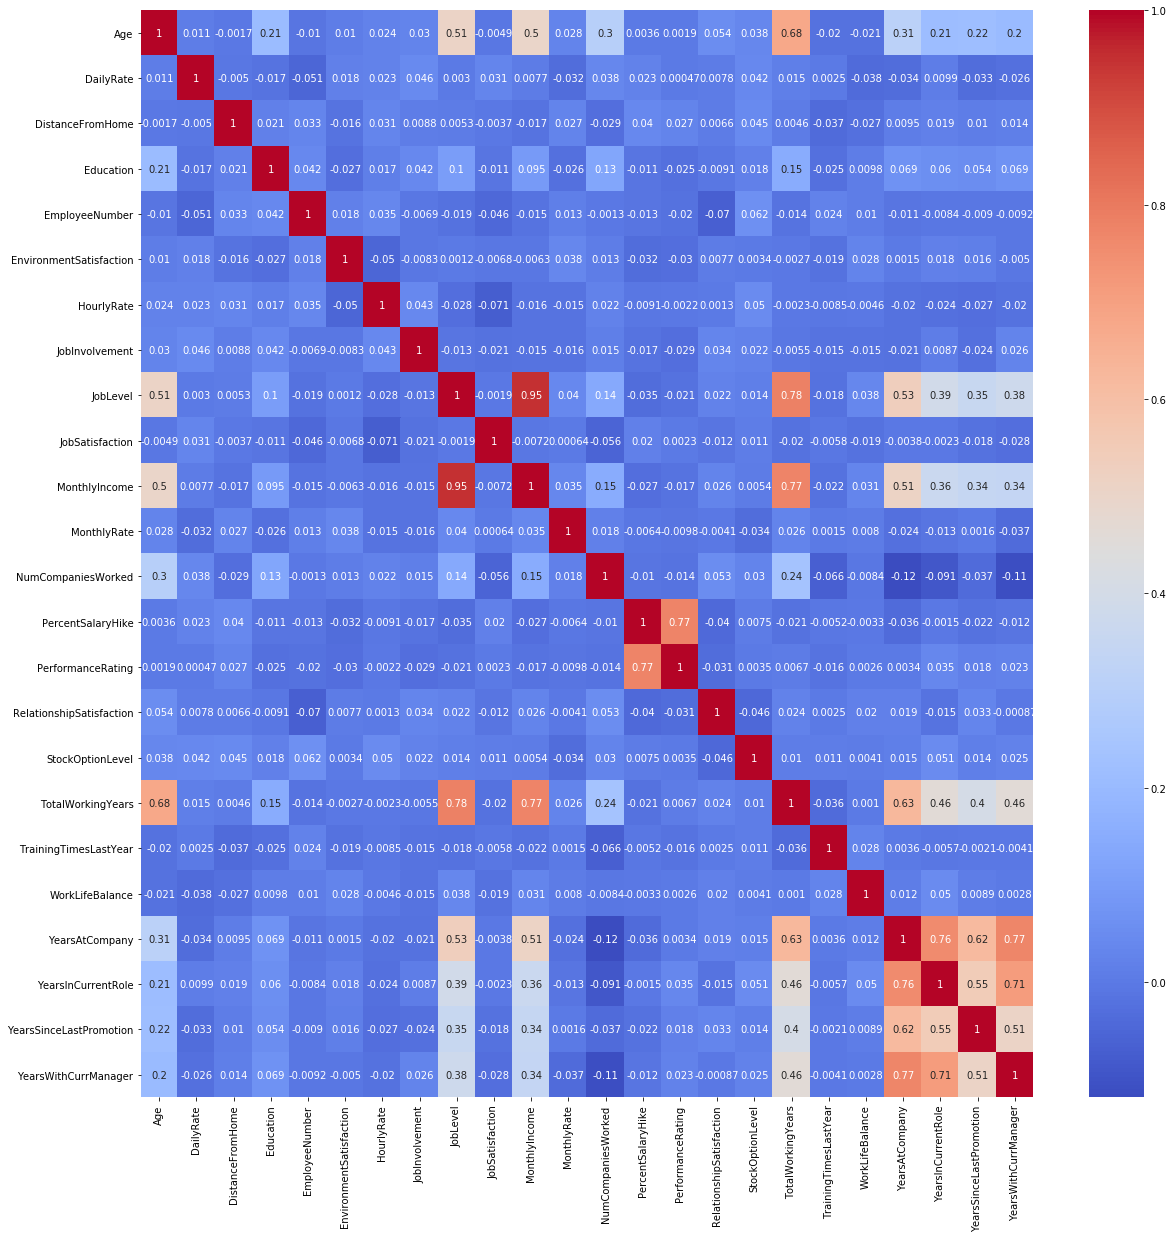

In [23]:
fig, ax = plt.subplots(figsize=(20,20))
sb.heatmap(df.corr(),
           cmap = 'coolwarm',
          annot = True)